# Data Visualization using Seaborn

- Seaborn is a Python visualization library based on matplotlib. 
- It provides a high-level interface for drawing - attractive statistical graphics. Here is the [documentation](http://seaborn.pydata.org/index.html).
- Go ahead and import seaborn. By convention, we alias seaborn as sns


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

pd.set_option('display.float_format', '{:,.4f}'.format)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("data/PH-HRIR-merged.csv")
df.head()

<ipython-input-2-188d2657e85c>:1: DtypeWarning: Columns (60,70,211,266,330,331,381,445,475,476,477,485,551,570,580,606) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/PH-HRIR-merged.csv")


,CASEID,V000,V001,V002,V003,V004,V005,V006,V007,V008,V008A,V009,V010,V011,V012,V013,V014,V015,V016,V018,V019,V019A,V020,V021,V022,V024,V025,V027,V028,V030,V034,V042,V044,V045A,V045B,V045C,V046,V023,V101,V102,V104,V105,V105A,V106,V107,V113,V115,V116,V119,V120,V121,V122,V123,V124,V125,V127,V128,V129,V130,V131,V133,V135,V136,V137,V138,V139,V140,V149,V150,V151,V152,V153,AWFACTT,AWFACTU,AWFACTR,AWFACTE,AWFACTW,V157,V158,V159,V160,V161,V169A,V169B,V170,V171A,V171B,V190,V191,V190A,V191A,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V235,V237,V238,V244,V301,V302A,V312,V313,V315,V316,V317,V318,V319,V320,V321,V322,V325A,V326,V327,V337,V361,V362,V363,V364,V367,V376,V376A,V379,V380,V384A,V384B,V384C,V384D,V393,V393A,V394,V395,V3A00Y,V3A00Z,V3A01,V3A02,V3A03,V3A04,V3A05,V3A06,V3A07,V3A08A,V3A08B,V3A08C,V3A08D,V3A08E,V3A08F,V3A08G,V3A08H,V3A08I,V3A08J,V3A08K,V3A08L,V3A08M,V3A08N,V3A08P,V3A08Q,V3A08R,V3A08S,V3A08T,V3A08U,V3A08V,V3A08X,V3A08Z,V401,V404,V405,V406,V415,V416,V417,V418,V418A,V426,V447,V463A,V463B,V463C,V463D,V463E,V463F,V463G,V463H,V463I,V463X,V463Z,V463AA,V463AB,V464,V465,V467B,V467C,V467D,V467F,V468,V501,V502,V503,V504,V507,V508,V509,V510,V511,V512,V513,V525,V527,V528,V529,V530,V531,V532,V535,V536,V537,V602,V603,V604,V605,V613,V614,V616,V621,V623,V624,V625,V626,V625A,V626A,V627,V628,V629,V632,V632A,V633B,V701,V702,V704,V704A,V705,V714,V714A,V715,V716,V717,V719,V729,V730,V731,V732,V739,V741,V743A,V743B,V743D,V743F,V744A,V744B,V744C,V744D,V744E,V745A,V745B,V746,V750,V751,V754CP,V754DP,V754JP,V754WP,V756,V761,V762,V763A,V763B,V763C,V766A,V766B,V767A,V774A,V774B,V774C,V777A,V781,V783,V784A,V784B,V784C,V784D,V784E,V784F,V784K,V784L,V784M,V784N,V784O,V784X,V791A,V822,V823,V824,V825,V826A,V828,V829,V833A,V834A,V836,V850A,V850B,V852A,V853A,V857A,V857B,V857C,V857D,V858,V801,V802,V803,V804,V805,V811,V812,V813,V814,V815A,V815B,V815C,D005,D101A,D101B,D101C,D101D,D101E,D102,D103A,D103B,D103C,D103D,D103E,D103F,D103G,D104,D105A,D105B,D105C,D105D,D105E,D105F,D105H,D105I,D105J,D105K,D106,D107,D108,D109,D110A,D110B,D110D,D110E,D110F,D110G,D111,D112,D112A,D113,D114,D115B,D115C,D115D,D115F,D115G,D115K,D115L,D115O,D115P,D115Q,D115V,D115W,D115X,D115Y,D115XE,D117A,D118A,D118B,D118C,D118D,D118F,D118G,D118J,D118K,D118L,D118O,D118P,D118Q,D118V,D118W,D118X,D118Y,D118XE,D119H,D119I,D119J,D119K,D119U,D119X,D119Y,D119XB,D119XD,D119XE,D119XF,D119XG,D119XH,D121,D122A,D122B,D122C,D124,D125,D126,D127,D128,D129,D130A,D130B,D130C,S1229AA,S1229AB,S1229AC,S1229BA,S1229BB,S1229BC,S1229BD,S1229BE,S1229BF,S1229BG,S102A,S104BA,S104BB,S104BC,S104BD,S104BZ,S104C,S104P,S108L,S109,S207C,S207D,S208,S239A,S305A,S306A,S308A,S308B,S308C,S705B,S705C,S705D,S717,S723,S815E,S904L,S933,S1107A,S1107B,SEDUC,SPROV,SPEDUC,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,HV008A,HV009,HV010,HV012,HV013,HV014,HV015,HV016,HV017,HV018,HV020,HV021,HV022,HV023,HV024,HV025,HV027,HV028,HV030,HV042,HV044,HV045A,HV045B,HV045C,HV046,HV801,HV802,HV803,HV201,HV202,HV201A,HV204,HV205,HV206,HV207,HV208,HV209,HV210,HV211,HV212,HV213,HV214,HV215,HV216,HV217,HV218,HV219,HV220,HV221,HV225,HV226,HV230A,HV230B,HV232,HV232B,HV232Y,HV235,HV237,HV237A,HV237B,HV237C,HV237D,HV237E,HV237F,HV237X,HV237Z,HV238,HV238A,HV241,HV242,HV243A,HV243B,HV243C,HV243D,HV243E,HV244,HV245,HV246,HV246A,HV246B,HV246C,HV246D,HV246E,HV246F,HV246G,HV252,HV270,HV271,HV270A,HV271A,SHUSN,SHSN,SHPROV,SH109B,SH109C,SH121G,SH121H,SH121I,SH121J,SH121K,SH122H,SH123A,SH123B,SH124A,SH201,SH202,SH206,SH207,SH220,SH221A,SH301A,SH301B,SH301C,SH301D,SH301E,SH301F,SH301G,SH301H,SH301I,SH301J,SH301K,SH301L,SH301M,SH301N,SH301O,SH301X,SH301Z,SH302A,SH302B,SH302C,SH302D,SH302E,SH302F,SH302G,SH302H,SH302I,SH302J,SH302K,SH302L,SH302M,SH302N,SH302O,SH302X,SH302Y,SH302Z,SH303,SH304,SH305,SH306,SH307,SH308A,SH308B,SH308C,SH308D,SH308E,SH308F,SH308G,SH308H,SH308X,SH401A,SH401B,SH401C,SH401D,SH401E,SH401F,SH401G,SH401H,SH401I,SH401J,SH401K,SH401L,SH401M,SH401N,

In [3]:
with open('data/PHHR71FL-data-dictionary.json', 'r') as file:
    hr_col_dict = json.load(file)

with open('data/PHIR71FL-data-dictionary.json', 'r') as file:
    ir_col_dict = json.load(file)
    
for col in df.columns:
    try:
        print(f'{col}: {hr_col_dict[col]}')
    except:
        print(f'{col}: {ir_col_dict[col]}')

CASEID: Case Identification
V000: Country code and phase
V001: Cluster number
V002: Household number
V003: Respondent's line number
V004: Ultimate area unit
V005: Women's individual sample weight (6 decimals)
V006: Month of interview
V007: Year of interview
V008: Date of interview (CMC)
V008A: Date of interview Century Day Code (CDC)
V009: Respondent's month of birth
V010: Respondent's year of birth
V011: Date of birth (CMC)
V012: Respondent's current age
V013: Age in 5-year groups
V014: Completeness of age information
V015: Result of individual interview
V016: Day of interview
V018: Row of month of interview
V019: Length of calendar
V019A: Number of calendar columns
V020: Ever-married sample
V021: Primary sampling unit
V022: Sample strata for sampling errors
V024: Region
V025: Type of place of residence
V027: Number of visits
V028: Interviewer identification
V030: Field supervisor
V034: Line number of husband
V042: Household selected for hemoglobin
V044: Selected for Domestic Violence

In [4]:
df.shape

(25074, 832)

### 1. Boxplot

Let's create a simple boxplot with seaborn. Looking at the column of `Total Expenditures`...

<Figure size 288x432 with 0 Axes>

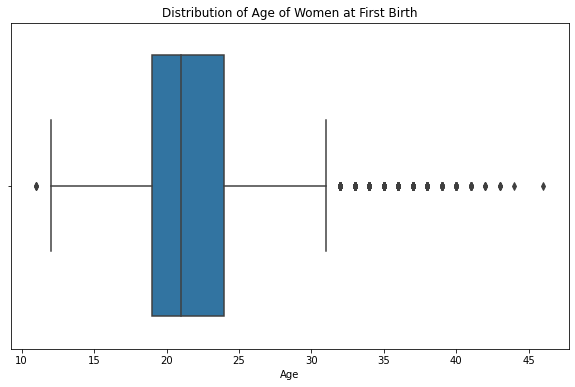

In [5]:
plt.figure(figsize=(4,6))

#Default x - horizontal orientation
# age of women respondents at first birth - V212

plt.figure(figsize=(10,6))

sns.boxplot(df["V212"])

plt.title("Distribution of Age of Women at First Birth")
plt.xlabel('Age')

plt.show()

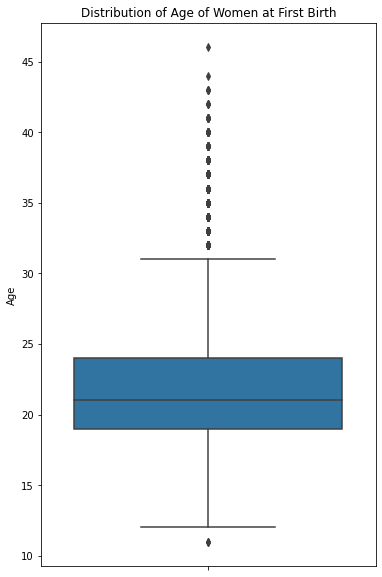

In [6]:
# Switch boxplot to vertical orientation 
plt.figure(figsize=(6,10))

sns.boxplot(y = df["V212"])

plt.title("Distribution of Age of Women at First Birth")
plt.ylabel('Age')
plt.show()

**RECAP.** How do we read boxplots?

<img src=https://jingwen-z.github.io/images/20190319-boxplot.png width=600 height=600 />

What if we want to see multiple boxplots in a single chart? Let's try to see the candidates' expenditures paid out using different funds.

In [7]:
# V152 - Age of household head, V012 - Respondent's current age, V212 - age at first birth
age_cols = ['V152', 'V012', 'V212']

for col in age_cols:
    print(col, df[col].unique())

V152 ['34.0' '62.0' '37.0' '27.0' '39.0' '30.0' '20.0' '40.0' '46.0' '44.0'
 '59.0' '55.0' '51.0' '69.0' '47.0' '50.0' '65.0' '72.0' '25.0' '60.0'
 '48.0' '41.0' '38.0' '42.0' '54.0' '63.0' '35.0' '52.0' '22.0' '24.0'
 '32.0' '17.0' '26.0' '57.0' '45.0' '43.0' '49.0' '36.0' '23.0' '58.0'
 '53.0' '28.0' '33.0' '21.0' '66.0' '29.0' '61.0' '31.0' '76.0' '68.0'
 '80.0' '70.0' '64.0' '56.0' '90.0' '75.0' '77.0' '83.0' '18.0'
 "Don't know" '71.0' '81.0' '82.0' '74.0' 37.0 21.0 57.0 38.0 35.0 53.0
 40.0 60.0 50.0 44.0 30.0 24.0 45.0 27.0 31.0 32.0 39.0 42.0 29.0 75.0
 43.0 36.0 65.0 33.0 46.0 48.0 54.0 69.0 71.0 34.0 41.0 58.0 76.0 49.0
 66.0 23.0 26.0 22.0 64.0 28.0 25.0 61.0 47.0 77.0 52.0 63.0 85.0 59.0
 68.0 56.0 74.0 55.0 72.0 62.0 20.0 70.0 67.0 51.0 84.0 81.0 79.0 82.0
 83.0 80.0 86.0 19.0 73.0 17.0 18.0 78.0 95.0 88.0 93.0 94.0 '19.0' '89.0'
 '79.0' '88.0' '67.0' '73.0' '78.0' '92.0' 92.0 90.0 87.0 89.0 15.0 91.0
 16.0 '85.0' '84.0' '95.0' '16.0' '86.0']
V012 [31. 15. 33. 44. 30. 40. 

In [8]:
df = df[df['V152']!="Don't know"]
ages = df[age_cols].astype(float)

ages.describe()

,V152,V012,V212
count,"25,068.0000","25,068.0000","15,811.0000"
mean,46.1682,30.1350,21.9939
std,12.9339,10.2326,4.5153
min,15.0000,15.0000,11.0000
25%,37.0000,21.0000,19.0000
50%,45.0000,29.0000,21.0000
75%,54.0000,39.0000,24.0000
max,95.0000,49.0000,46.0000


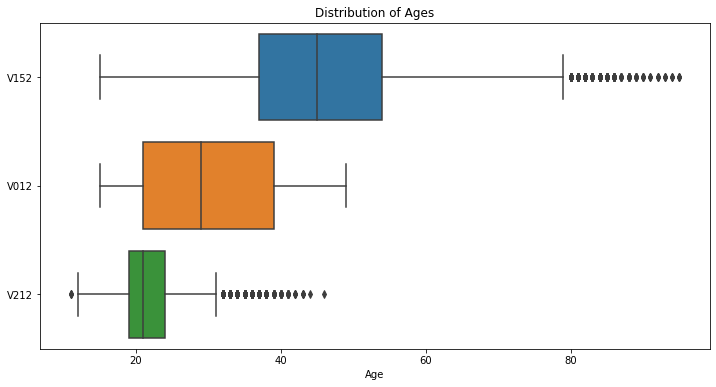

In [9]:
# Multiple boxplots in a single chart requires x and y values
plt.figure(figsize=(12,6))

sns.boxplot(x="value", y="variable", data=pd.melt(ages))
plt.title("Distribution of Ages")
plt.xlabel('Age')
plt.ylabel('')

# plt.savefig("fig/Viz3.png",  bbox_inches='tight')
plt.show()

### 2. Scatterplots

Now, let's try to plot the `Age of 1st Birth` and `Age of 1st sex` of respondents and color them by `Region`.

In [10]:
# V212 - Age of 1st Birth, V531 - Age of 1st Sex, V101 - Region
fem_ages = ['V212', 'V531']

for col in fem_ages:
    print(col, df[col].unique())

V212 [21. nan 29. 23. 22. 17. 16. 24. 26. 18. 20. 25. 27. 19. 15. 34. 30. 38.
 28. 32. 14. 36. 40. 35. 33. 37. 12. 31. 13. 39. 11. 41. 43. 42. 46. 44.]
V531 ['19.0' 'Not had sex' '26.0' '14.0' '21.0' '13.0' '17.0' '22.0' '18.0'
 '16.0' '23.0' '20.0' '24.0' 'Inconsistent' '27.0' '35.0' '15.0' '25.0'
 '9.0' '29.0' '38.0' '28.0' '30.0' '34.0' '37.0' '31.0' '33.0' '36.0'
 '32.0' '12.0' '8.0' '10.0' '39.0' '42.0' '11.0' '45.0' '43.0' '40.0'
 '41.0' '44.0']


In [11]:
fem_age_df1 = df[(df['V531']!='Not had sex') & (df['V531']!='Inconsistent')].copy()
fem_age_df1['V531'] = fem_age_df1['V531'].astype(float)

fem_age_df1[['V212', 'V531']].head()

,V212,V531
0,21.0000,19.0000
2,29.0000,26.0000
3,21.0000,14.0000
4,23.0000,21.0000
5,22.0000,21.0000


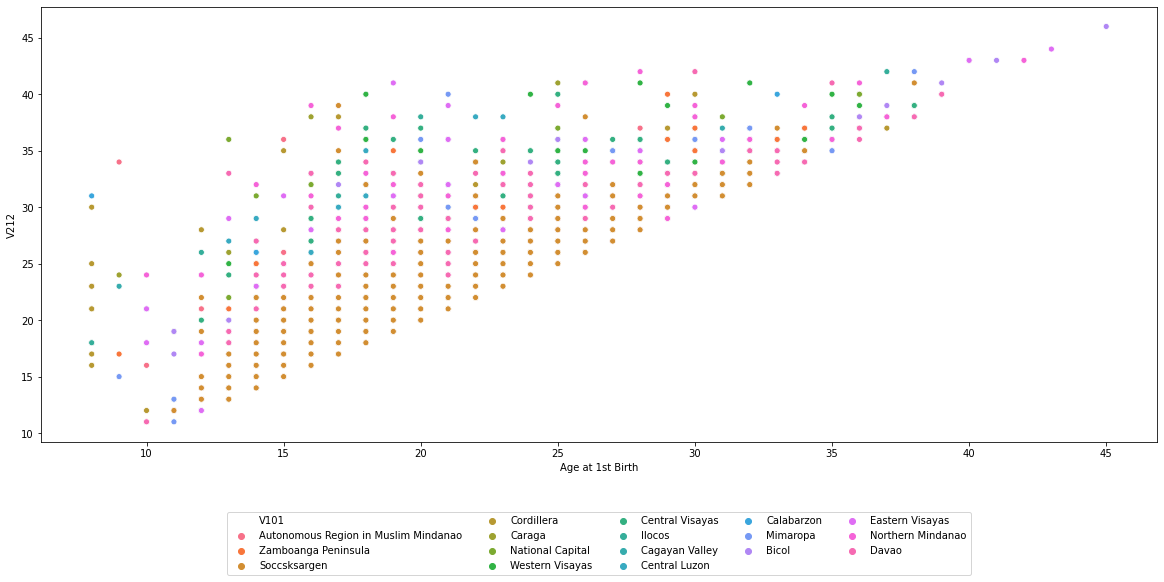

In [12]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x="V531", y="V212", hue="V101", data= fem_age_df1)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.xlabel('Age at 1st Sex')
plt.xlabel('Age at 1st Birth')

plt.show()

**Assignment.** Is setting a color by region possible with matplotlib?

### 3. Correlation Plot

Correlation measures the degree to which there is a linear relationship between the two variables. It is the covariance of the two variables normalized by the variance of each variable.

Let's try to get the correlation matrix of a dataframe with the following columns
- `V012`: Respondent's current age
- `V005`: Women's individual sample weight (6 decimals)
- `V212`: Age of respondent at 1st birth
- `V325A`: Cost of current method (in CURRENCY)
- `V201`: Total children ever born
- `V511`: Age at first cohabitation
- `V730`: Husband/partner's age

In [13]:
filtered_df = df[['V012','V005','V212','V325A','V201','V511','V730']]

# To get correlation values
filtered_df.corr()

,V012,V005,V212,V201,V511,V730
V012,1.0000,0.0006,0.3499,0.6317,0.3237,0.8178
V005,0.0006,1.0000,0.0246,-0.0434,0.0190,-0.0037
V212,0.3499,0.0246,1.0000,-0.2708,0.8358,0.1661
V201,0.6317,-0.0434,-0.2708,1.0000,-0.2585,0.4289
V511,0.3237,0.0190,0.8358,-0.2585,1.0000,0.1483
V730,0.8178,-0.0037,0.1661,0.4289,0.1483,1.0000


<img src=https://www.mathsisfun.com/data/images/correlation-examples.svg width=1000 height=1000 />

However, we have to emphasize the saying that **"correlation does not imply causation"**. You may conclude that two variable have a strong relationship or a weak relationship but correlation is not enough to be able to say that one variable causes the change to another variable. Always keep that in mind!

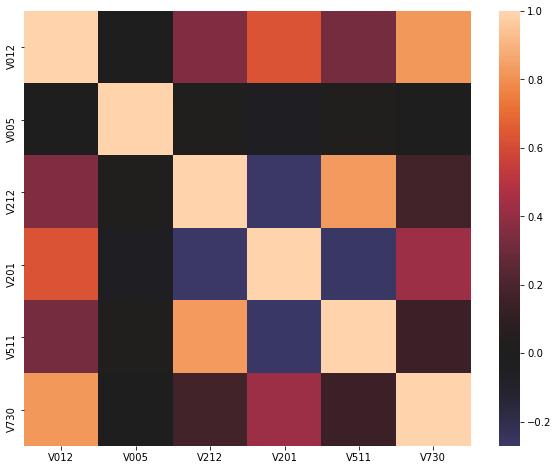

In [14]:
# Make a correlation heatmap
plt.figure(figsize=(10,8))

sns.heatmap(filtered_df.corr(), center=0.00)

plt.show()

### 4. Other Plots


#### a) Pairplot

<Figure size 720x576 with 0 Axes>

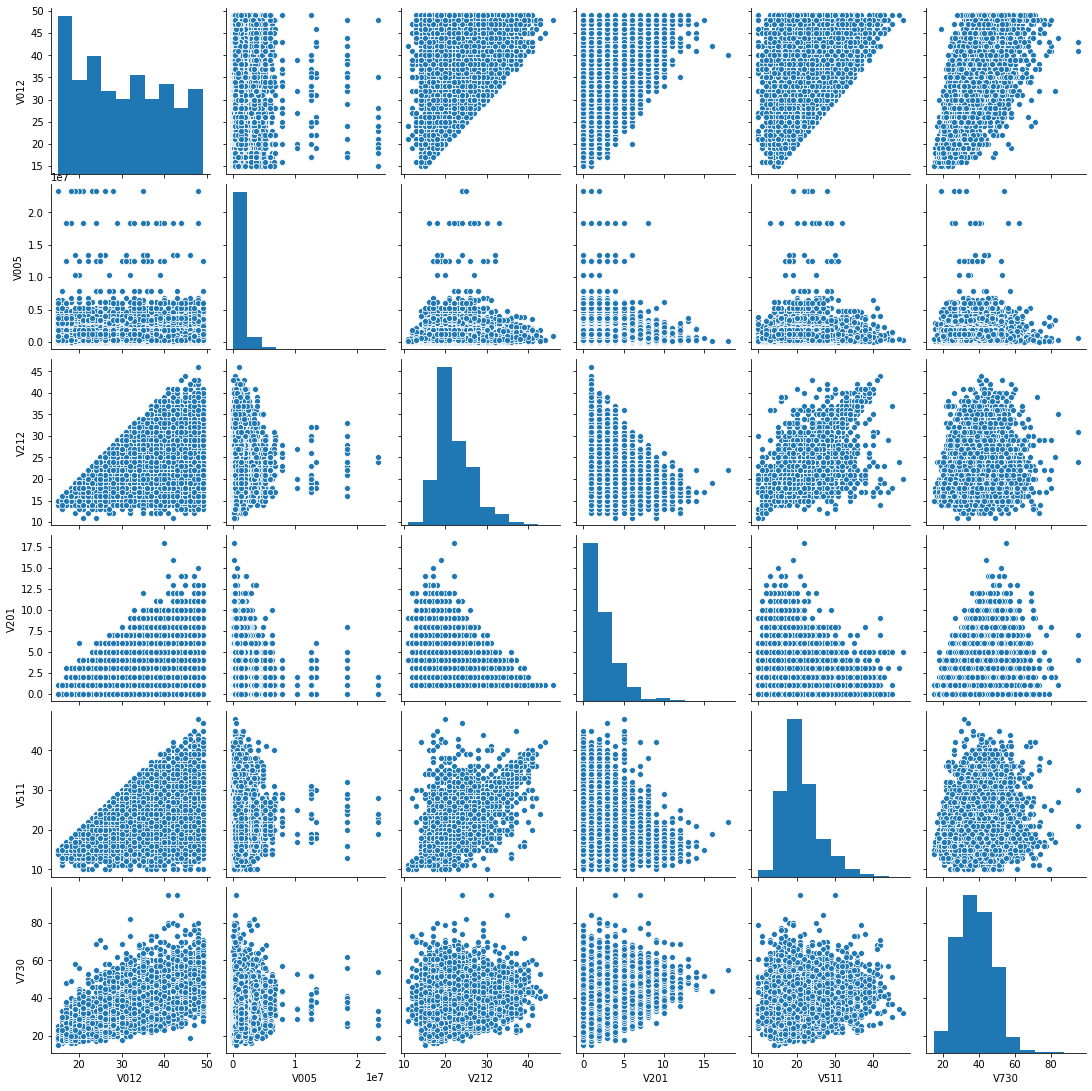

In [15]:
plt.figure(figsize=(10,8))

sns.pairplot(filtered_df)

plt.show()

#### b) Clustered bar

In [16]:
fem_age_df2 = (df.groupby("V101")[['V012', 'V730']].mean().reset_index().sort_values('V730', ascending = False))
fem_age_df2

,V101,V012,V730
15,Western Visayas,30.5215,38.4836
8,Davao,30.7962,38.1417
11,Mimaropa,30.3246,38.1305
2,Cagayan Valley,30.3561,38.1098
7,Cordillera,29.9278,38.1078
12,National Capital,30.2472,38.0957
16,Zamboanga Peninsula,30.5359,38.0368
10,Ilocos,30.4856,37.9458
5,Central Luzon,30.3103,37.7036
9,Eastern Visayas,29.8607,37.6325


In [17]:
fem_age_df3 = pd.melt(fem_age_df2, id_vars="V101")
fem_age_df3['variable'] = fem_age_df3['variable'].replace({'V012':"Women's Age", 'V730':"Partner's Age"})

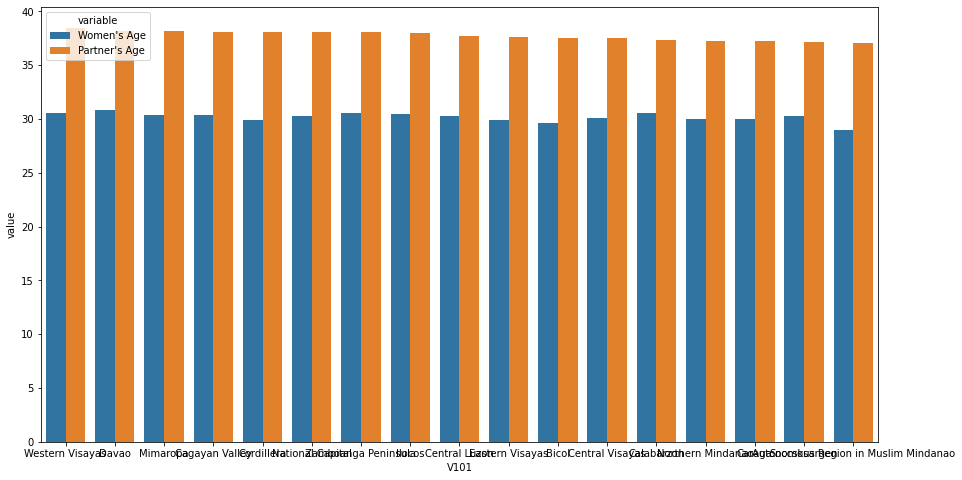

In [18]:
plt.figure(figsize=(15, 8))
sns.barplot(x="V101", y="value", hue="variable", data=fem_age_df3)
plt.show()

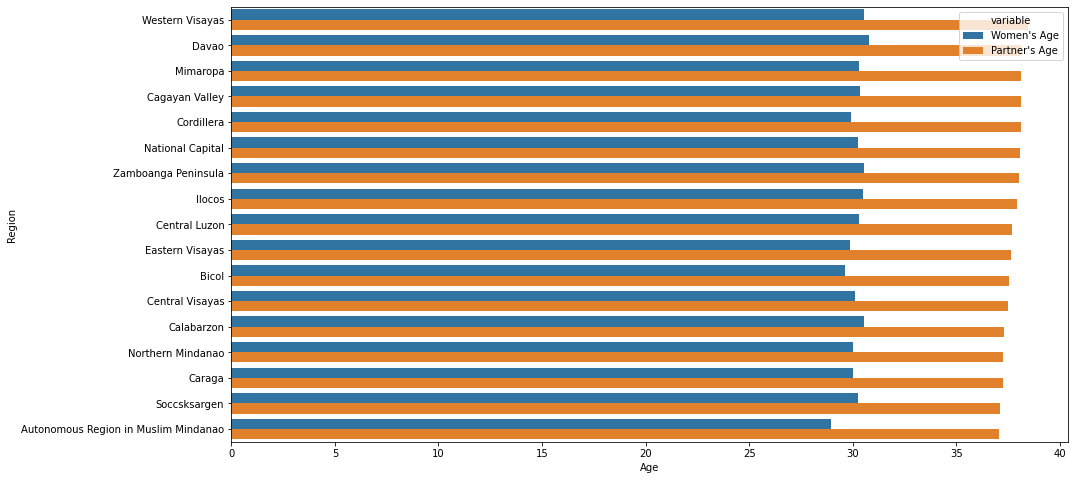

In [19]:
plt.figure(figsize=(15, 8))
sns.barplot(x="value", y="V101", hue="variable", data=fem_age_df3)

plt.xlabel('Age')
plt.ylabel('Region')

plt.show()